# ECS7020P Mini-project. Basic solution

# 1. Author

**Student Name**: Bekzod Mannapbekov  
**Student ID**: 210807459

# 2. Problem formulation
** Classification Problem - identifying two songs.**

These clips can be interpreted as either a 'hum' or a 'whistle' of the same 15-second segment of a popular theme song. The problem is to classify these clips into of one of two classes "Harry Potter Theme" and "Star Wars".

This will help me gain a reasonable understanding of the types of attributes that can be used to compare different clips of real-world audio data.



# 3 Machine Learning pipeline

To begin with, data will be uploaded to my drive and placed to a folder. 

Then, features which directly determine the characteristics of the audio signal, will be extracted.

After getting preprocessed data, the data is going to be invoked into two sets "training and validation". Followed by, supvervised ML models SVM and KNN. Models will be assessed through performance scores such as accuracy, precision and recall.

In conclusion, there will be a model that predicts two clips in terms of the name and interpreter.



# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output.

Librosa is a Python package for music and audio analysis. Librosa is basically used when we work with audio data like in music generation(using LSTM's), Automatic Speech Recognition. It provides the building blocks necessary to create the music information retrieval systems.

Audio files consist of different features, which can be extractred for further analysis, due to it helps to reduce dimensionality.

Defining input and ouput of the model that is going to be built in the paper. As mentioned above, our input is n number of Star Wars and Potter (both hums and whistles) recordings had been collected by students. The model should output the label of the song.

Features from librosa packages;

Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero. This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. It is also extensively used in a wide range of other audio application domains, such as musical genre classification, highlight detection, speech analysis, singing voice detection in music, and environmental sound recognition. The simplest method to distinguish between voiced and unvoiced speech is to analyze the zero crossing rate. A large number of zero crossings implies that there is no dominant low-frequency oscillation.

Chroma feature: In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as “pitch class profiles”, are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation. 

Mel-Frequency Cepstral Coefficients(MFCCs): The MFCC (perceptual feature) feature defines characteristics that describe the overall form of a curve of the amplitude spectrum and simulates the specification of human voice. This feature is widely used in modern apps performing the detection of voice activity (VAD).

Spectral Roloff: This is a measure of the amount of the right-skewedness of the power spectrum.The spectral roll off point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies. That is, the roll-off is the frequency below which 85% of accumulated spectral magnitude is concentrated. Like the centroid, it takes on higher values for right-skewed spectra.




# 5 Modelling

Describe the ML models that you will implement. 

According the problem statement above, it is a classification problem therefore I used two classification models KNN and SVM.

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.

 SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

Both models are used for this problem.


# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

 To begin with, the data is devided into validation"0.3" and training"0.7". The models are assessed in 5 aspects confusion matrix, accuracy, precision, recall and overall score. The necessary amount of data of models is provided after training and validation stages. SVM will be cross-validated, while kNN model will be ran through grid search for the purpose of finding the optimal number of nearest neighbours.

# 7. Dataset

Starwars - 415
Harry Potter - 415
Hums - 594
Whistles - 296

# 8. Results

1.Let's unzip the sample data and check how many audio files we have.


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import librosa.display
drive.mount('/content/drive')

In [ ]:
sample_path = '/content/drive/MyDrive/ML_mini_project/*.wav'
files = glob.glob(sample_path)

len(files)

830

This figure (830) corresponds to the number of items or samples in our dataset. 
Let's have a look at the name of the 830 audio file:

In [ ]:

for file in files:
  print(file.split('/')[-1])

S216_hum_3_StarWars.wav
S54_hum_2_Potter.wav
S135_hum_2_Potter.wav
S23_hum_3_StarWars.wav
S86_hum_4_StarWars.wav
S36_hum_1_Potter.wav
S157_hum_1_Potter.wav
S169_hum_1_Potter.wav
S216_hum_4_StarWars.wav
S145_hum_1_StarWars.wav
S77_whistle_2_Potter.wav
S23_hum_4_StarWars.wav
S86_hum_3_StarWars.wav
S137_hum_4_StarWars.wav
S53_hum_1_Potter.wav
S130_whistle_1_StarWars.wav
S192_hum_3_StarWars.wav
S188_hum_2_Potter.wav
S165_whistle_2_StarWars.wav
S137_hum_3_StarWars.wav
S192_hum_4_StarWars.wav
S31_hum_2_Potter.wav
S150_hum_2_Potter.wav
S126_whistle_2_Potter.wav
S154_whistle_2_StarWars.wav
S72_whistle_2_Potter.wav
S197_hum_2_Potter.wav
S206_hum_4_StarWars.wav
S195_whistle_2_StarWars.wav
S200_whistle_2_StarWars.wav
S171_hum_2_Potter.wav
S10_hum_2_Potter.wav
S88_whistle_1_Potter.wav
S209_whistle_2_Potter.wav
S206_hum_3_StarWars.wav
S167_hum_2_StarWars.wav
S94_hum_1_Potter.wav
S167_whistle_2_Potter.wav
S149_hum_4_StarWars.wav
S148_hum_1_Potter.wav
S17_hum_1_Potter.wav
S127_hum_3_StarWars.wav
S210

We can create a table-like structure using Python lists that collects the information that we can extract from the names of the audio files:

In [ ]:

MLENDHW_table = [] 

for file in files:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[2]
  song = file.split('/')[-1].split('_')[3].split('.')[0]
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_table

[['S216_hum_3_StarWars.wav', 'S216', 'hum', '3', 'StarWars'],
 ['S54_hum_2_Potter.wav', 'S54', 'hum', '2', 'Potter'],
 ['S135_hum_2_Potter.wav', 'S135', 'hum', '2', 'Potter'],
 ['S23_hum_3_StarWars.wav', 'S23', 'hum', '3', 'StarWars'],
 ['S86_hum_4_StarWars.wav', 'S86', 'hum', '4', 'StarWars'],
 ['S36_hum_1_Potter.wav', 'S36', 'hum', '1', 'Potter'],
 ['S157_hum_1_Potter.wav', 'S157', 'hum', '1', 'Potter'],
 ['S169_hum_1_Potter.wav', 'S169', 'hum', '1', 'Potter'],
 ['S216_hum_4_StarWars.wav', 'S216', 'hum', '4', 'StarWars'],
 ['S145_hum_1_StarWars.wav', 'S145', 'hum', '1', 'StarWars'],
 ['S77_whistle_2_Potter.wav', 'S77', 'whistle', '2', 'Potter'],
 ['S23_hum_4_StarWars.wav', 'S23', 'hum', '4', 'StarWars'],
 ['S86_hum_3_StarWars.wav', 'S86', 'hum', '3', 'StarWars'],
 ['S137_hum_4_StarWars.wav', 'S137', 'hum', '4', 'StarWars'],
 ['S53_hum_1_Potter.wav', 'S53', 'hum', '1', 'Potter'],
 ['S130_whistle_1_StarWars.wav', 'S130', 'whistle', '1', 'StarWars'],
 ['S192_hum_3_StarWars.wav', 'S192',

In [ ]:
#Dataset with the information about recordings extracted from names
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id')
MLENDHW_df

participant interpretation number      song
file_id                                                                
S216_hum_3_StarWars.wav            S216            hum      3  StarWars
S54_hum_2_Potter.wav                S54            hum      2    Potter
S135_hum_2_Potter.wav              S135            hum      2    Potter
S23_hum_3_StarWars.wav              S23            hum      3  StarWars
S86_hum_4_StarWars.wav              S86            hum      4  StarWars
...                                 ...            ...    ...       ...
S6_whistle_1_StarWars.wav            S6        whistle      1  StarWars
S135_hum_2_StarWars.wav            S135            hum      2  StarWars
S161_whistle_2_Potter.wav          S161        whistle      2    Potter
S133_whistle_2_StarWars.wav        S133        whistle      2  StarWars
S156_hum_2_StarWars.wav            S156            hum      2  StarWars

[830 rows x 4 columns]

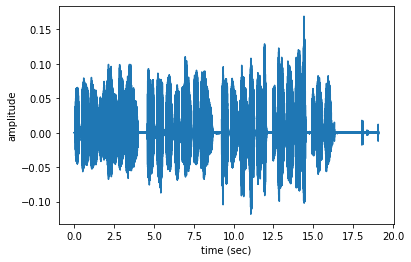

In [ ]:
#Following cell shows the plot of the n-th audio signal and the information about this particular recording

n=0

fs = None
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

In [ ]:
MLENDHW_df.loc[files[n].split('/')[-1]]

participant           S216
interpretation         hum
number                   3
song              StarWars
Name: S216_hum_3_StarWars.wav, dtype: object

In [ ]:
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 841883 samples


2. Next stage is aimed to extract the features of audio signals

In [ ]:
#The function extracts 5 chosen features: MFCC, Spectral Roloff, Zero-Crossing rate, Chroma and RMS

def get_features(files,labels_file, scale_audio=False, onlySingleDigit=False):
    X,y =[],[]
    for file in tqdm(files):
        fileID = file.split('/')[-1]
        file_name = file.split('/')[-1]

        yi = labels_file.loc[fileID]['song']=='StarWars'

        fs = None 
        x, fs = librosa.load(file,sr=fs)

        mfcc = librosa.feature.mfcc(x, sr=fs)
        spectral_roloff = np.mean(librosa.feature.spectral_rolloff(x, sr=fs))
        zero_rate = librosa.feature.zero_crossing_rate(x)
        chroma_stft = librosa.feature.chroma_stft(x, sr=fs)
        rms = librosa.feature.rms(x)
        
        xi = [np.mean(mfcc), np.mean(spectral_roloff), np.mean(zero_rate), np.mean(chroma_stft), np.mean(rms)]
        X.append(xi)
        y.append(yi)
        
    return np.array(X),np.array(y)

In [ ]:
#Append function to extract those features
X,y = get_features(files, labels_file=MLENDHW_df, scale_audio=False, onlySingleDigit=False)

100%|██████████| 830/830 [03:00<00:00,  4.60it/s]


In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (830, 5)
The shape of y is (830,)
The labels vector is [ True False False  True  True False False False  True  True False  True
  True  True False  True  True False  True  True  True False False False
  True False False  True  True  True False False False False  True  True
 False False  True False False  True False  True  True False False  True
  True False False False False  True  True  True False False  True  True
 False False  True False False False  True False False  True False  True
  True  True  True  True  True  True False False  True False False False
  True False False  True  True False False  True  True  True  True  True
  True False  True False  True False False False False  True  True  True
 False  True False  True  True False False  True  True  True  True False
  True  True False False False  True False  True  True  True  True  True
 False  True False False  True False  True False False False False  True
  True False False  True  True  True  True False Fa

In [ ]:
print(' The number of Star Wars recordings is ', np.count_nonzero(y))
print(' The number of Potter recordings is ', y.size - np.count_nonzero(y))

 The number of Star Wars recordings is  415
 The number of Potter recordings is  415


3. In the next section two types of models are performed:

In [ ]:
#Splitting the data into training and validation sets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((581, 5), (249, 5), (581,), (249,))

**SVM model**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val  = scaler.fit_transform(X_val)

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.8055077452667814
Validation  Accuracy 0.4819277108433735
The support vectors are (557, 5)


In [ ]:
cv_scores = cross_val_score(model, X_val, y_val, cv=5)

print('Cross-validation scores mean value:{}'.format(np.mean(cv_scores)))

Cross-validation scores mean value:0.5139591836734694


This CV score is extremely close to 0.5, so the classifier is slightly better than throwing a coin. Thus, it could be concluded that the model is not useful enough.

Assessing the performance of the model:

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, yt_p).ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
f_1 = 2*precision*recall/(precision + recall)

print('Precision=',round(precision, 3))
print('Recall=',round(recall, 3))
print('F-1 score=',round(f_1, 3))

Precision= 0.812
Recall= 0.786
F-1 score= 0.799


The difference between precision and recall is small, so the model performs well on the training data

In [ ]:

tn, fp, fn, tp = confusion_matrix(y_val, yv_p).ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
f_1 = 2*precision*recall/(precision + recall)

print('Precision=',round(precision, 3))
print('Recall=',round(recall, 3))
print('F-1 score=',round(f_1, 3))

Precision= 0.505
Recall= 0.392
F-1 score= 0.442


However, on validation data it could be seen that recall is much lower than precision and this prediction could not be trusted as the proportion of false negative prediction is high, because small value of the recall metrics means that it has low confidence in positive (in that case Star Wars song prediction) observations detection

**K-Nearest Neighbours classifier**

In [ ]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

print('Training dataset accuracy: {0}.'.format(knn.score(X_train, y_train)))
print('Validation dataset accuracy: {0}.'.format(knn.score(X_val, y_val)))

Training dataset accuracy: 0.6953528399311532.
Validation dataset accuracy: 0.5180722891566265.


The gap between training and validation accuracies is lower than in SVM model.

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10)}

#Gridsearch to search for opt values of n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#Fitting model
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
#check top performing n_neighbors value
print("Best parameters",knn_gscv.best_params_)
print("Best scores", knn_gscv.best_score_)

#Insert the optimal number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

print('Validation dataset accuracy: {0}.'.format(knn.score(X_val, y_val)))

Best parameters {'n_neighbors': 9}
Best scores 0.5249926318891835
Validation dataset accuracy: 0.5301204819277109.


In this model, validation data scores even exceeded training scores. However, there is no significant difference and then, accuracies are nearly the same.

Assessing the performance of the model:

In [ ]:

tn, fp, fn, tp = confusion_matrix(y_train, yt_p).ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
f_1 = 2*precision*recall/(precision + recall)

print('Precision=',round(precision, 3))
print('Recall=',round(recall, 3))
print('F-1 score=',round(f_1, 3))

Precision= 0.607
Recall= 0.639
F-1 score= 0.622


In [ ]:
#Scores on validation data
tn, fp, fn, tp = confusion_matrix(y_val, yv_p).ravel()
precision = tp/(tp + fp)
recall = tp/(tp + fn)
f_1 = 2*precision*recall/(precision + recall)

print('Precision=',round(precision, 3))
print('Recall=',round(recall, 3))
print('F-1 score=',round(f_1, 3))

Precision= 0.552
Recall= 0.531
F-1 score= 0.541


Taking everything into consideration, Knn model looks better compare SVM model in all aspects. It can be seen from the data above.

# 9. Conclusions

Ultimately, the problem of classifying as one of two songs was solved. Two models have been developed SVM and KNN. The preformance score as mentioned above KNN looks better with 0.53 validation score. It cannot be considered as good model due to the quality of datasets are not good enough and even after manually cleaning for 4 hours straight making sure i used all the data, I think it can be improved with additional data, with bigger range of people and more complex models can be developed but cosidering the time frame I could not show my full potential.